# 1. Data preparation

In [ ]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def data_prep():
    # read the D3 dataset
    df = pd.read_csv('D3.csv')

    #Correct data types for admission_type_id, discharge_disposition_id, admission_source_id
    #Changto interval/integer to nominal/str
    df['admission_type_id'] = df['admission_type_id'].astype(str)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
    df['admission_source_id'] = df['admission_source_id'].astype(str)

    # impute missing values using mode
    df['race'].fillna(df['race'].mode()[0], inplace=True)
    df['age'].fillna(df['age'].mode()[0], inplace=True)
    df['chlorpropamide'].fillna(df['chlorpropamide'].mode()[0], inplace=True)

    #Mapping age group into numeric
    age_map = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3,'[30-40)': 4,'[40-50)': 5, '[50-60)': 6,'[60-70)': 7,'[70-80)': 8,'[80-90)': 9,'[90-100)': 10}
    df['age'] = df['age'].map(age_map)

    # one-hot encoding
    df = pd.get_dummies(df)

    return df
df = data_prep()

# target/input split
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = X.to_numpy()

# set the random seed - consistent
rs = 10

X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

# 2. Building NN model using the default setting

In [ ]:
from sklearn.neural_network import MLPClassifier
default_model = MLPClassifier(random_state=rs)
default_model.fit(X_train, y_train)

#2/ Default NN model
print("2/Neural Network model using default settings:")
print("\na) Hyperparameters:")
print(default_model.get_params(deep=True))

print("\nb) Train accuracy:", default_model.score(X_train, y_train))
print("   Test accuracy:", default_model.score(X_test, y_test))
y_pred_default_model = default_model.predict(X_test)
print(classification_report(y_test, y_pred_default_model,digits=4))

2/Neural Network model using default settings:

a) Hyperparameters used in building tree:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

b) Train accuracy: 0.7606247930235125
   Test accuracy: 0.6085640695428204
              precision    recall  f1-score   support

           0     0.6287    0.6712    0.6492      8382
           1     0.5812    0.5351    0.5572      7148

    accuracy                         0.6086     15530
   macro avg     0.6049    0.6032    0.6032     15530
weighted avg     0.6068    0.6086    0.6069     15530



C:\Users\htdat\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.neural_network import MLPClassifier
default_model_2 = MLPClassifier(max_iter=1000,random_state=rs)
default_model_2.fit(X_train, y_train)

#2/ Default NN model
print("2/Neural Network model using default settings with max_iteration=1000:")
print("\na) Hyperparameters:")
print(default_model_2.get_params(deep=True))

print("\nb) Train accuracy:", default_model_2.score(X_train, y_train))
print("   Test accuracy:", default_model_2.score(X_test, y_test))
y_pred_default_model_2 = default_model_2.predict(X_test)
print(classification_report(y_test, y_pred_default_model_2,digits=4))

2/Neural Network model using default settings with max_iteration=1000:

a) Hyperparameters used in building tree:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

b) Train accuracy: 0.7631913014681532
   Test accuracy: 0.6022537025112685
              precision    recall  f1-score   support

           0     0.6316    0.6312    0.6314      8382
           1     0.5679    0.5683    0.5681      7148

    accuracy                         0.6023     15530
   macro avg     0.5997    0.5998    0.5997     15530
weighted avg     0.6023    0.6023    0.6023     15530



=> Max_iter does not increase much accuracy and is time-consuming => remain max_iter=200

# 3. Building NN model with GridsearchCV

In [ ]:
print(X_train.shape)

(36236, 159)


In [ ]:
# grid search CV - tunning
params = {'hidden_layer_sizes': [(x,) for x in range(1, 159, 20)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred,digits=4))
print(cv.best_params_)

Train accuracy: 0.6470912904294073
Test accuracy: 0.647005795235029
              precision    recall  f1-score   support

           0     0.6488    0.7542    0.6976      8382
           1     0.6440    0.5213    0.5762      7148

    accuracy                         0.6470     15530
   macro avg     0.6464    0.6377    0.6369     15530
weighted avg     0.6466    0.6470    0.6417     15530

{'hidden_layer_sizes': (1,)}


In [ ]:
# fine-tuning
params = {'hidden_layer_sizes': [(x,) for x in range(1, 20, 2)]}

cv_fine = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_fine.fit(X_train, y_train)

print("Train accuracy:", cv_fine.score(X_train, y_train))
print("Test accuracy:", cv_fine.score(X_test, y_test))

y_pred = cv_fine.predict(X_test)
print(classification_report(y_test, y_pred,digits=4))

print(cv_fine.best_params_)

Train accuracy: 0.6705762225411194
Test accuracy: 0.6482936252414682
              precision    recall  f1-score   support

           0     0.6531    0.7430    0.6952      8382
           1     0.6406    0.5372    0.5844      7148

    accuracy                         0.6483     15530
   macro avg     0.6469    0.6401    0.6398     15530
weighted avg     0.6474    0.6483    0.6442     15530

{'hidden_layer_sizes': (9,)}


In [ ]:
# optimal-tuning
params = {'hidden_layer_sizes': [(7,),(8,),(9,),(10,),(11,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_optimal = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_optimal.fit(X_train, y_train)
optimal_model = cv_optimal.best_estimator_

print("3/Neural Network model using optimal-tuning settings:")
print("\na) Hyperparameters:")
print(optimal_model.get_params(deep=True))

print("\nb) Train accuracy:", optimal_model.score(X_train, y_train))
print("   Test accuracy:", optimal_model.score(X_test, y_test))

y_pred_optimal_model = optimal_model.predict(X_test)
print(classification_report(y_test, y_pred_optimal_model,digits=4))

3/Neural Network model using optimal-tuning settings:

a) Hyperparameters:
{'activation': 'relu', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (9,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

b) Train accuracy: 0.6711557567060382
   Test accuracy: 0.648615582743078
              precision    recall  f1-score   support

           0     0.6537    0.7422    0.6951      8382
           1     0.6406    0.5389    0.5854      7148

    accuracy                         0.6486     15530
   macro avg     0.6471    0.6405    0.6402     15530
weighted avg     0.6477    0.6486    0.6446     15530



The GridSearch returned a hidden layer of 6 neurons and alpha value of 0.0001 as the optimal hyperparameters.

# 4. Feature selection

In [ ]:
import pickle
with open('DT.pickle', 'rb') as f1:
    dt_best,roc_index_optimal_dt, fpr_optimal_dt, tpr_optimal_dt = pickle.load(f1)
with open('LR.pickle', 'rb') as f2:
    lr_best,roc_index_optimal_lr, fpr_optimal_lr, tpr_optimal_lr = pickle.load(f2)

In [ ]:
X_train.shape

In [ ]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)

(36236, 15)


In [ ]:
params = {'hidden_layer_sizes': [(7,),(8,),(9,),(10,),(11,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred,digits=4))

FS_optimal_model = cv_sel_model.best_estimator_
print(cv_sel_model.best_params_)

Train accuracy: 0.6472844684843801
Test accuracy: 0.6447520927237604
              precision    recall  f1-score   support

           0     0.6436    0.7659    0.6995      8382
           1     0.6468    0.5027    0.5657      7148

    accuracy                         0.6448     15530
   macro avg     0.6452    0.6343    0.6326     15530
weighted avg     0.6451    0.6448    0.6379     15530

{'alpha': 0.0001, 'hidden_layer_sizes': (11,)}


# 5. Performance analysis

In [ ]:
from sklearn.metrics import roc_auc_score
fine_model = cv_fine.best_estimator_

y_pred_proba_nn_1 = default_model.predict_proba(X_test)
y_pred_proba_nn_2 = fine_model.predict_proba(X_test)
y_pred_proba_nn_3 = optimal_model.predict_proba(X_test)
y_pred_proba_nn_4 = FS_optimal_model.predict_proba(X_test_sel_model)

roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_nn_3 = roc_auc_score(y_test, y_pred_proba_nn_3[:, 1])
roc_index_nn_4 = roc_auc_score(y_test, y_pred_proba_nn_4[:, 1])

print("ROC index on test for NN with default setting:", roc_index_nn_1)
print("ROC index on test for NN with size-tuning gridsearch:", roc_index_nn_2)
print("ROC index on test for NN with size/alpha-tuning gridsearch:", roc_index_nn_3)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_nn_4)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_nn_3, tpr_nn_3, thresholds_nn_3 = roc_curve(y_test, y_pred_proba_nn_3[:,1])
fpr_nn_4, tpr_nn_4, thresholds_nn_4 = roc_curve(y_test, y_pred_proba_nn_4[:,1])

ROC index on test for NN with default setting: 0.6425339002875695
ROC index on test for NN with size-tuning gridsearch: 0.6962835613047225
ROC index on test for NN with size/alpha-tuning gridsearch: 0.696719165112119
ROC index on test for NN with feature selection and gridsearch: 0.6939626136802595


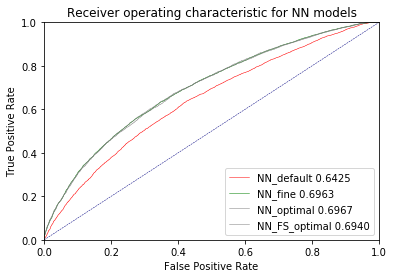

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.4f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN_fine {:.4f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_nn_3, tpr_nn_3, label='NN_optimal {:.4f}'.format(roc_index_nn_3), color='gray', lw=0.5)
plt.plot(fpr_nn_4, tpr_nn_4, label='NN_FS_optimal {:.4f}'.format(roc_index_nn_4), color='gray', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for NN models')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_index_optimal_nn = roc_index_nn_3
fpr_optimal_nn = fpr_nn_3
tpr_optimal_nn = tpr_nn_3

# Final remark

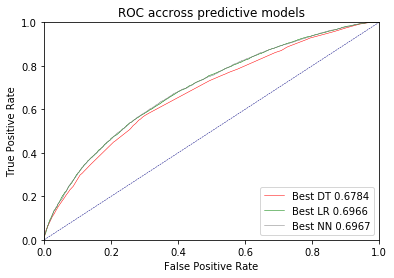

In [ ]:
plt.plot(fpr_optimal_dt, tpr_optimal_dt, label='Best DT {:.4f}'.format(roc_index_optimal_dt), color='red', lw=0.5)
plt.plot(fpr_optimal_lr, tpr_optimal_lr, label='Best LR {:.4f}'.format(roc_index_optimal_lr), color='green', lw=0.5)
plt.plot(fpr_optimal_nn, tpr_optimal_nn, label='Best NN {:.4f}'.format(roc_index_optimal_nn), color='gray', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC accross predictive models')
plt.legend(loc="lower right")
plt.show()